In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
import glob

In [4]:
file_date = '2019-10-03-053043-1-4'

In [7]:
print(os.getcwd())
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/multi/ddpg/64_64_NN/one/Random/'+file_date+'/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/multi/ddpg/64_64_NN/one/Random/2019-10-03-053043-1-4/log\\2019-10-03.csv']

In [8]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(25000, 4)


In [9]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [10]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(25000, 168)

In [11]:
Agent_1_action_df

actuator_name,light_node#1,light_node#2,light_node#3,light_node#4,light_node#5,light_node#6,light_node#7,light_node#8,light_node#9,light_node#10,...,sma3_node#23,sma4_node#23,sma5_node#23,sma6_node#23,sma1_node#24,sma2_node#24,sma3_node#24,sma4_node#24,sma5_node#24,sma6_node#24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.508218,0.203013,-0.750642,0.545987,-0.556999,-0.765778,0.102111,0.690788,-0.975562,0.528812,...,0.993555,-0.097524,0.568230,0.840321,0.651272,-0.832834,-0.596768,0.100314,0.414400,0.509392
2,-0.607409,0.217663,-0.396395,-0.388429,-0.827820,0.598125,0.280589,-0.839712,0.427425,0.336668,...,-0.603871,0.075829,-0.183180,-0.910459,-0.951085,0.247160,0.463841,-0.667349,0.441822,0.311161
3,0.549893,-0.077141,-0.884936,-0.868203,-0.598218,0.511830,-0.867502,0.015720,0.999953,0.397588,...,-0.415622,-0.418211,0.435627,-0.303201,0.981996,0.901103,0.324062,0.834420,0.990787,-0.894714
4,-0.185650,-0.881918,-0.329343,-0.334260,0.570048,0.166296,-0.005577,-0.226661,-0.047043,-0.268792,...,-0.939396,-0.608151,0.672528,0.311811,0.347178,-0.589326,0.217552,0.686696,-0.999119,0.409462
5,-0.350400,0.960450,-0.903089,-0.611736,0.385388,-0.511057,-0.649688,0.839523,0.945226,-0.808637,...,0.483999,0.128167,-0.315887,-0.062266,0.111179,-0.380165,-0.129714,-0.536211,-0.375445,-0.606503
6,-0.957527,0.284679,-0.915564,0.843680,0.884200,-0.719690,0.869779,0.130345,-0.114735,-0.769834,...,-0.984859,-0.449102,-0.972199,-0.228800,0.584777,-0.923506,0.174648,-0.639688,-0.465211,0.635587
7,-0.744650,-0.011583,-0.969730,-0.892342,0.423670,-0.399281,-0.587808,-0.131683,-0.952987,0.804820,...,0.105451,-0.708942,0.474934,0.111209,-0.341790,0.689782,-0.537522,0.221838,-0.620188,-0.191502
8,-0.448537,0.936987,0.090497,-0.879065,0.155631,0.714318,-0.079003,-0.958386,-0.839712,-0.443591,...,0.648207,0.198481,0.438142,0.796168,0.026515,-0.765728,-0.123660,0.773608,0.500445,0.428656
9,0.234978,-0.702826,0.559204,-0.091466,-0.052252,-0.798194,-0.221903,0.492944,-0.273541,-0.728225,...,0.202681,0.969889,-0.046103,-0.961381,-0.606595,0.893364,-0.725190,0.029503,0.705544,-0.413795


c:\users\daiwei lin\appdata\local\conda\conda\envs\unity_ml\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


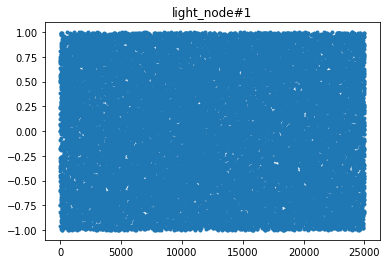

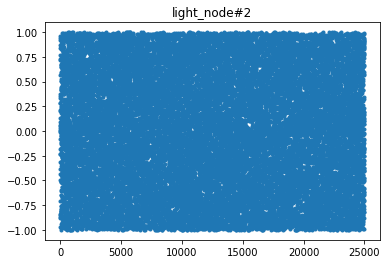

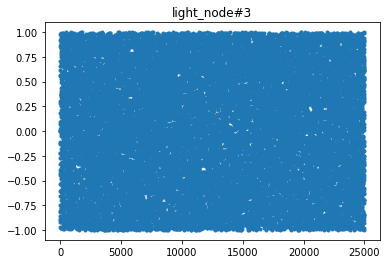

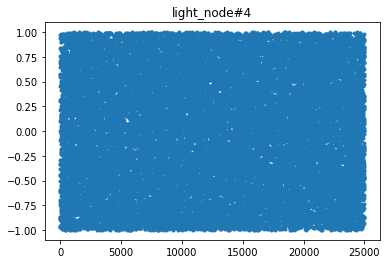

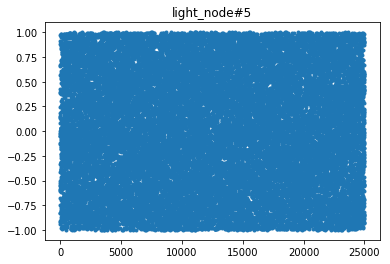

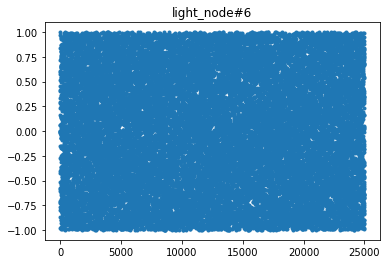

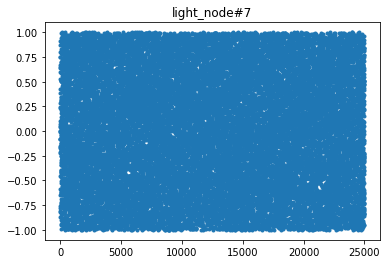

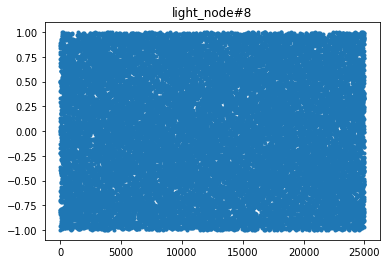

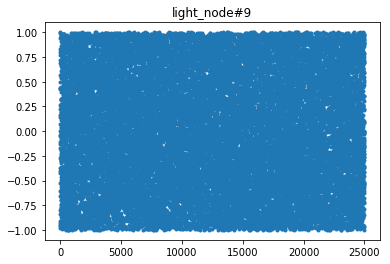

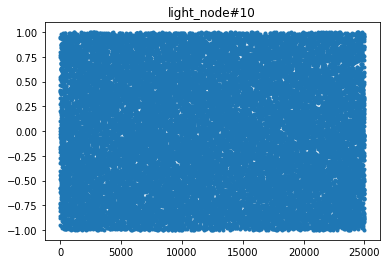

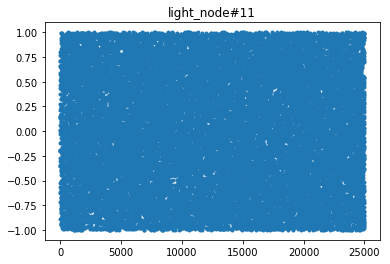

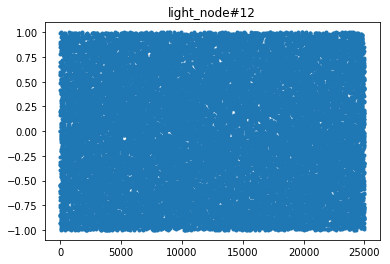

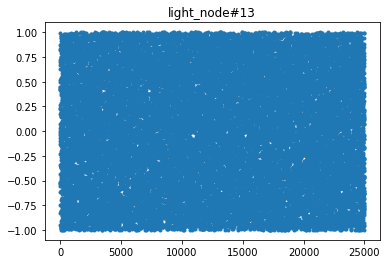

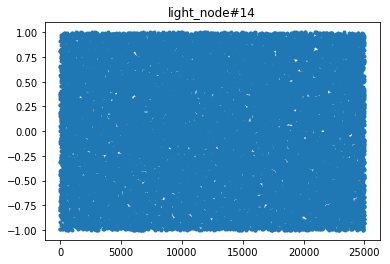

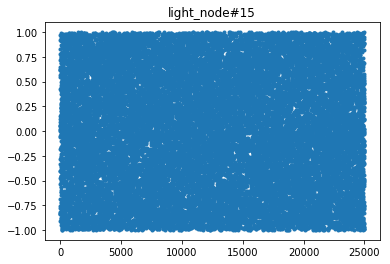

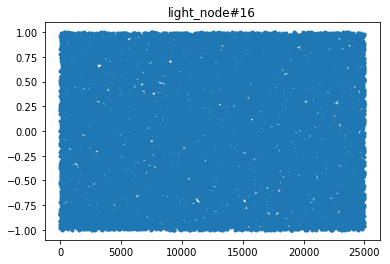

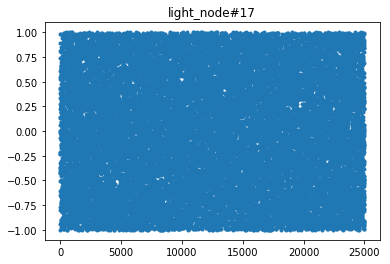

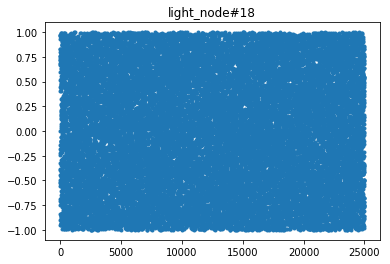

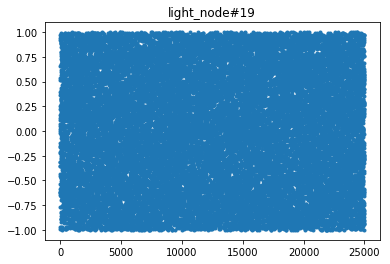

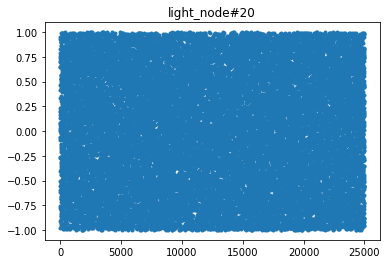

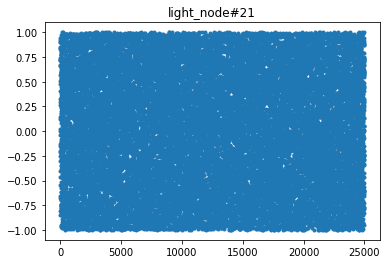

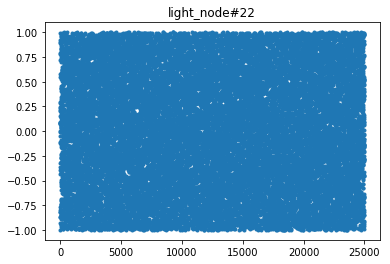

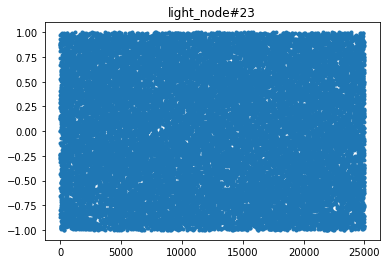

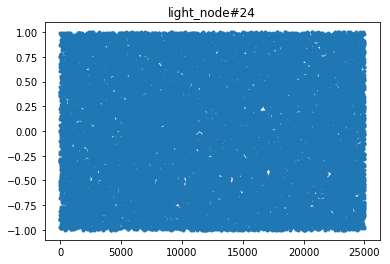

In [12]:
for i in range(24):
    plt.figure()
    col_name = 'light_node#'+str(i+1)
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col_name],'.')
    plt.title(col_name)
    

## Visitor activities

In [13]:
import re
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/multi/ddpg/64_64_NN/one/Random/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/multi/ddpg/64_64_NN/one/Random/"+file_date+"/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
title = "Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,"+ \
        "Location_x_2,Location_y_2,Location_z_2,Destination_x_2,Destination_y_2,Destination_z_2,Distance_2,"+ \
        "Location_x_3,Location_y_3,Location_z_3,Destination_x_3,Destination_y_3,Destination_z_3,Distance_3,"+ \
        "Location_x_4,Location_y_4,Location_z_4,Destination_x_4,Destination_y_4,Destination_z_4,Distance_4,"+ \
        "Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5"+"\n"
f_out.write(title)
for line in f_in:
    if line.strip():# not empty line    
        
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

['../SHARCNET/Results/multi/ddpg/64_64_NN/one/Random/2019-10-03-053043-1-4\\s_random_20016571ob.out']


### 1. Position

In [14]:
visitor_data = pd.read_csv("../SHARCNET/Results/multi/ddpg/64_64_NN/one/Random/"+file_date+"/visitor_log.csv", sep=',')
print(visitor_data.shape)

(612494, 36)


In [15]:
visitor_data.shape

(612494, 36)

In [16]:
visitor_data.iloc[-2,:]

Time               12499.960000
Location_x_1           1.600000
Location_y_1           0.000000
Location_z_1           0.200000
Destination_x_1        1.700000
Destination_y_1        0.100000
Destination_z_1        0.300000
Distance_1             0.133083
Location_x_2          -1.100000
Location_y_2           0.000000
Location_z_2          -0.300000
Destination_x_2       -0.400000
Destination_y_2        0.100000
Destination_z_2       -0.300000
Distance_2             0.682852
Location_x_3           0.600000
Location_y_3           0.000000
Location_z_3           0.100000
Destination_x_3       -2.000000
Destination_y_3        0.100000
Destination_z_3        0.600000
Distance_3             2.666182
Location_x_4          -1.500000
Location_y_4           0.000000
Location_z_4          -0.700000
Destination_x_4       -0.400000
Destination_y_4        0.100000
Destination_z_4       -0.300000
Distance_4             1.159969
Location_x_5           1.100000
Location_y_5           0.000000
Location

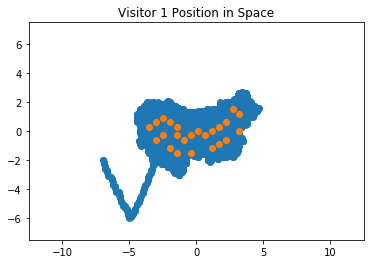

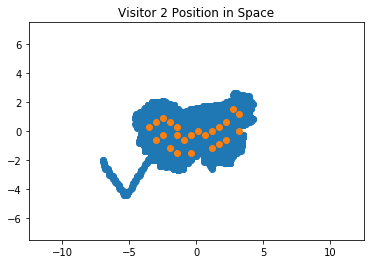

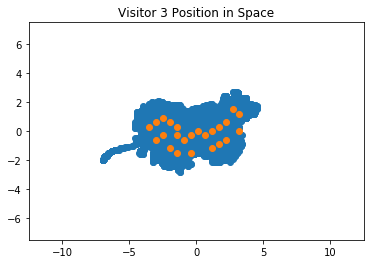

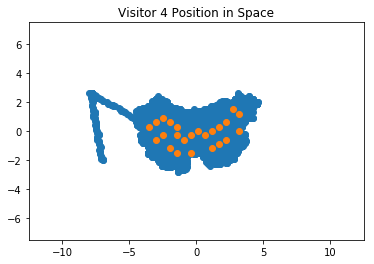

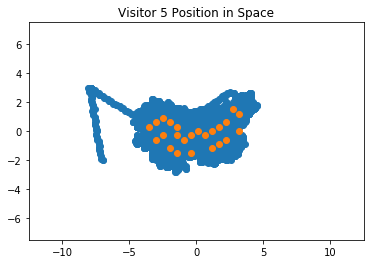

In [17]:
nodes_position = pd.read_csv("NodePosition.csv")

for i in range(1,6):
    plt.figure()
    plt.scatter(visitor_data['Location_x_' + str(i)], visitor_data['Location_z_' + str(i)])
    plt.xlim([-12.5,12.5])
    plt.ylim([-7.5,7.5])
    plt.title("Visitor "+ str(i) + " Position in Space")
    plt.scatter(nodes_position['x'], nodes_position['z'])

In [18]:
import seaborn
def heat_map(resolution, data_x, data_z):
    bins_x = np.linspace(-12.5,12.5,resolution[0]+1)
    bins_z = np.linspace(-7.5,7.5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (x_discretized[i],z_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
    ax.invert_yaxis()
    return activity_map


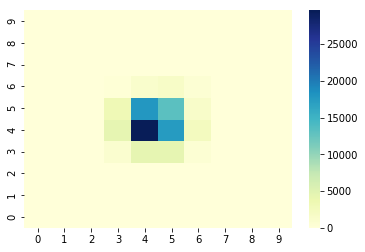

In [22]:
resolution = (10,10)

activity_map = heat_map(resolution,visitor_data['Location_x_1'],visitor_data['Location_z_1'])


In [19]:
for i in range(1,6):
    print("\nVisitor {}".format(i))
    print("x max {}".format(np.max(visitor_data['Location_x_'+str(i)])))
    print("x min {}".format(np.min(visitor_data['Location_x_'+str(i)])))
    print("y max {}".format(np.max(visitor_data['Location_y_'+str(i)])))
    print("y min {}".format(np.min(visitor_data['Location_y_'+str(i)])))
    print("z maz {}".format(np.max(visitor_data['Location_z_'+str(i)])))
    print("z min {}".format(np.min(visitor_data['Location_z_'+str(i)])))



Visitor 1
x max 6.1
x min -5.9
y max 1.0
y min -0.4
z maz 6.6
z min -4.1

Visitor 2
x max 5.2
x min -6.2
y max 5.3
y min -0.4
z maz 4.2
z min -4.9

Visitor 3
x max 6.9
x min -7.2
y max 4.1
y min -0.4
z maz 4.6
z min -5.4

Visitor 4
x max 5.1
x min -6.3
y max 2.1
y min -0.3
z maz 5.1
z min -3.9

Visitor 5
x max 5.5
x min -6.1
y max 4.6
y min -0.1
z maz 3.8
z min -5.7


In [6]:
visitor_data['Location_x_1'].loc[visitor_data['Location_x_1']<-10]

890806    -11.9
890807    -15.3
890808    -18.8
890809    -22.2
890810    -25.6
890811    -19.2
890812    -22.6
890813    -26.0
890814    -29.4
890815    -32.8
890816    -36.3
890817    -39.7
890818    -43.1
890819    -19.0
890820    -22.4
890821    -25.8
890822    -29.3
890823    -32.7
890824    -36.1
890825    -39.5
890826    -42.9
890827    -19.0
890828    -22.4
890829    -25.9
890830    -29.3
890831    -32.7
890832    -36.1
890833    -39.5
890834    -43.0
890835    -19.0
           ... 
4420194   -29.3
4420195   -32.7
4420196   -36.1
4420197   -39.5
4420198   -43.0
4420199   -19.0
4420200   -22.4
4420201   -25.9
4420202   -29.3
4420203   -32.7
4420204   -36.1
4420205   -39.5
4420206   -43.0
4420207   -19.0
4420208   -22.4
4420209   -25.9
4420210   -29.3
4420211   -32.7
4420212   -36.1
4420213   -39.5
4420214   -43.0
4420215   -46.4
4420216   -19.0
4420217   -22.4
4420218   -25.9
4420219   -29.3
4420220   -32.7
4420221   -36.1
4420222   -39.5
4420223   -43.0
Name: Location_x_1, Leng

In [8]:
visitor_data.iloc[890800:890900]

,Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,Location_x_2,Location_y_2,...,Destination_y_4,Destination_z_4,Distance_4,Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5
890800,18179.62,-1.8,0.0,-0.3,-1.5,0.1,-0.3,0.363528,20.8,-13297.8,...,0.1,-0.3,22.91242,23.0,-13297.8,15.6,-1.5,0.1,-0.3,22.9124
890801,18179.64,-1.8,0.0,-0.3,-1.5,0.1,-0.3,0.363519,21.3,-15957.4,...,0.1,-0.3,22.91242,23.8,-15957.4,17.0,-1.5,0.1,-0.3,22.9124
890802,18179.66,-1.8,0.0,-0.3,-1.5,0.1,-0.3,0.363519,21.8,-18617.0,...,0.1,-0.3,22.91242,24.5,-18617.0,18.5,-1.5,0.1,-0.3,22.9124
890803,18179.68,-1.8,0.1,-0.3,-1.5,0.1,-0.3,0.363614,19.3,0.1,...,0.1,-0.3,22.49481,19.2,0.1,9.3,-1.5,0.1,-0.3,22.7454
890804,18179.70,-5.1,-2.7,0.3,-1.5,0.1,-0.3,3.68833,20.1,-2659.5,...,0.1,-0.3,22.66192,19.9,-2659.5,10.8,-1.5,0.1,-0.3,22.9124
890805,18179.72,-8.5,-5.7,1.0,-1.5,0.1,-0.3,7.17249,20.7,-5319.1,...,0.1,-0.3,22.91242,20.5,-5319.1,12.3,-1.5,0.1,-0.3,22.9124
890806,18179.74,-11.9,-8.7,1.7,-1.5,0.1,-0.3,10.6569,21.3,-7978.8,...,0.1,-0.3,22.91242,21.1,-7978.8,13.8,-1.5,0.1,-0.3,22.9124
890807,18179.76,-15.3,-11.6,2.4,-1.5,0.1,-0.3,14.1413,21.9,-10638.4,...,0.1,-0.3,22.91242,21.7,-10638.4,15.3,-1.5,0.1,-0.3,22.9124
890808,18179.78,-18.8,-14.6,3.0,-1.5,0.1,-0.3,17.6258,22.6,-13298.0,...,0.1,-0.3,22.91242,22.3,-13298.0,16.8,-1.5,0.1,-0.3,22.9124
890809,18179.80,-22.2,-17.6,3.7,-1.5,0.1,-0.3,18.1578,23.2,-15957.7,...,0.1,-0.3,22.91242,22.9,-15957.7,18.2,-1.5,0.1,-0.3,22.9124


In [12]:
## DEBUG ##
# subtract files near the place it breaks
import re
from collections import deque
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/SARA_LED_Multi/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/SARA_LED_Multi/"+file_date+"/visitor_log_partial.txt","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# title = "Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,"+ \
#         "Location_x_2,Location_y_2,Location_z_2,Destination_x_2,Destination_y_2,Destination_z_2,Distance_2,"+ \
#         "Location_x_3,Location_y_3,Location_z_3,Destination_x_3,Destination_y_3,Destination_z_3,Distance_3,"+ \
#         "Location_x_4,Location_y_4,Location_z_4,Destination_x_4,Destination_y_4,Destination_z_4,Distance_4,"+ \
#         "Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5"+"\n"
# f_out.write(title)

lines_before = deque(maxlen=100)
lines_after = deque(maxlen=100)

for line in f_in:
    if line.strip():# not empty line    
        lines_before.append(line)
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None and x[0]=='18179.68': #locate the crash event
            print("Record found")
            break
            
for line in f_in:
    if line.strip():
        lines_after.append(line)
    if len(lines_after) >= 100:
        break
for line in lines_before:
    f_out.write(line)
for line in lines_after:
    f_out.write(line)
            
        
f_in.close()
f_out.close()



['../SHARCNET/Results/SARA_LED_Multi/2019-07-30-063158\\s_multi_sara_17799892ob.out']


### visitor's activities between 1-1500 episode

In [47]:

total_time = visitor_data.iloc[-1,0]
period = [total_time * 1/8000, total_time * 1500/8000]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]

In [48]:
period_data.head()

,Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,Location_x_2,Location_y_2,...,Destination_y_4,Destination_z_4,Distance_4,Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5
551,11.28,-0.6,0.0,-0.5,-0.4,0.1,-0.3,0.268501,-0.2,0.0,...,0.1,-0.3,0.339904,0.3,0.0,-0.9,1.7,0.1,0.3,1.80976
552,11.30,-0.6,0.0,-0.5,-0.4,0.1,-0.3,0.269202,-0.2,0.0,...,0.1,-0.3,0.339904,0.3,0.0,-0.9,1.7,0.1,0.3,1.80938
553,11.32,-0.6,0.0,-0.5,-0.4,0.1,-0.3,0.26987,-0.2,0.0,...,0.1,-0.3,0.339904,0.3,0.0,-0.9,1.7,0.1,0.3,1.809
554,11.34,-0.5,0.1,-0.5,-0.4,0.1,-0.3,0.234705,-0.2,0.1,...,0.1,-0.3,0.326941,0.4,0.1,-0.9,1.7,0.1,0.3,1.77933
555,11.36,-0.6,0.0,-0.5,-0.4,0.1,-0.3,0.277219,-0.2,0.1,...,0.1,-0.3,0.353931,0.3,0.0,-0.9,1.7,0.1,0.3,1.80197


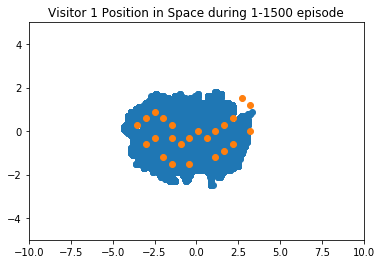

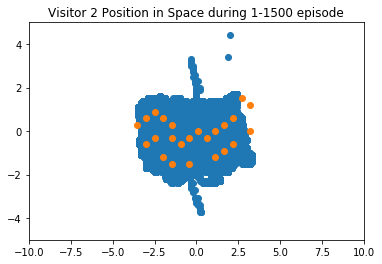

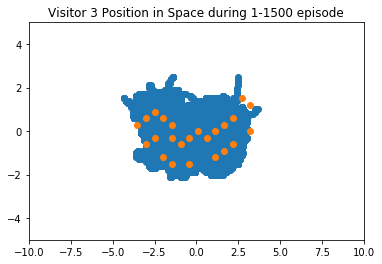

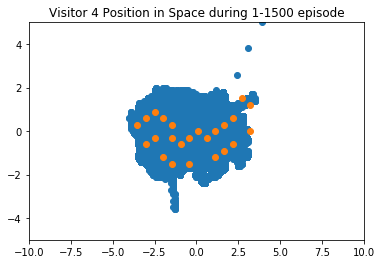

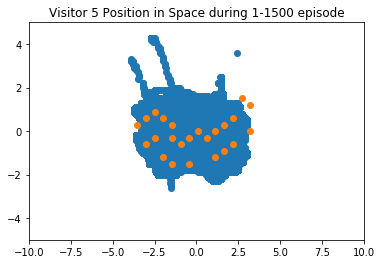

In [50]:
for i in range(1,6):
    plt.figure()
    plt.scatter(period_data['Location_x_'+str(i)], period_data['Location_z_'+str(i)])
    plt.xlim([-10,10])
    plt.ylim([-5,5])
    plt.title("Visitor " + str(i) + " Position in Space during 1-1500 episode")
    plt.scatter(nodes_position['x'], nodes_position['z'])

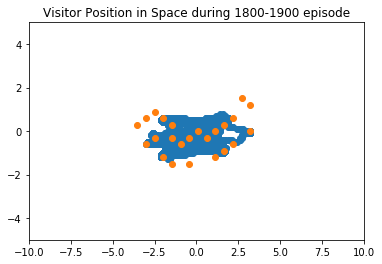

In [56]:
period = [total_time * 1800/8000, total_time * 1900/8000]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]
plt.scatter(period_data['Location_x'], period_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space during 1800-1900 episode")
plt.scatter(nodes_position['x'], nodes_position['z'])

In [51]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# speed

In [52]:
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0        

Text(0, 0.5, 'Instant Speed (m/s)')

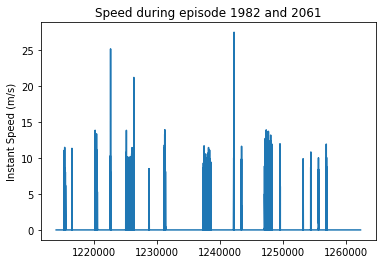

In [53]:
plt.plot(speed)
plt.title("Speed during episode 1982 and 2061")
plt.ylabel("Instant Speed (m/s)")

Text(0, 0.5, 'Instant Speed (m/s)')

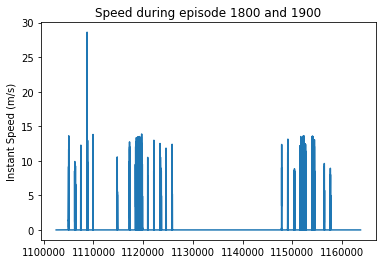

In [57]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0    
plt.plot(speed)
plt.title("Speed during episode 1800 and 1900")
plt.ylabel("Instant Speed (m/s)")

<font color=red>The vistor is constantly moving.</font>
***

### visitor's activities between 1800-1900 episode

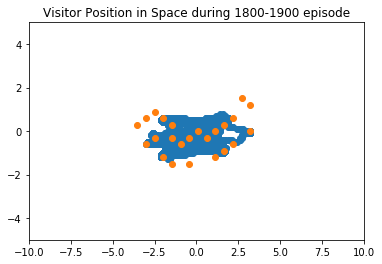

In [54]:
period = [total_time * 1800/8000, total_time * 1900/8000]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]
plt.scatter(period_data['Location_x'], period_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space during 1800-1900 episode")
plt.scatter(nodes_position['x'], nodes_position['z'])

Text(0, 0.5, 'Instant Speed (m/s)')

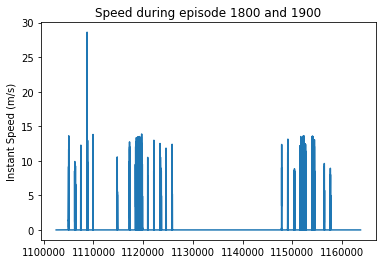

In [55]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0    
plt.plot(speed)
plt.title("Speed during episode 1800 and 1900")
plt.ylabel("Instant Speed (m/s)")

### 2.Vsitor speed

In [20]:
visitor_data = visitor_data.fillna(method='bfill')
visitor_data

,Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed
0,0.02,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
1,0.04,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
2,0.06,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
3,0.08,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
4,0.10,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
5,0.12,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
6,0.14,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
7,0.16,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
8,0.18,-9.1,0.1,-0.9,-1.5,0.1,-0.3,7.667956,-383.3979
9,0.20,-9.1,0.1,-0.9,-1.5,0.1,-0.3,7.666529,0.0713587


## Plot visitor position with IR sensing range

In [94]:
import matplotlib.patches as patches
import matplotlib as mpl

def plot_scene(ax=None):
    nodes_position = pd.read_csv("NodePosition.csv")
    if ax is None:
        fig = plt.figure(figsize=(12.5,7.5))
        ax = fig.add_subplot(111)
    
    ir_coverages = []
    for i in range(nodes_position.shape[0]):
        ir = patches.Rectangle((-0.5,0), 1, 2, color="blue",  alpha=0.20)
        T = mpl.transforms.Affine2D().rotate_deg(-180+(360-nodes_position.iloc[i]['angle'])) + mpl.transforms.Affine2D().translate(nodes_position.iloc[i]['x'], nodes_position.iloc[i]['z']) + ax.transData
        ir.set_transform(T)
        ax.add_patch(ir)
    plt.scatter(nodes_position['x'], nodes_position['z'])
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    return ax

import seaborn
from matplotlib.colors import LogNorm
def heat_map(resolution, data_x, data_z, axe=None):
    bins_x = np.linspace(-12.5,12.5,resolution[0]+1)
    bins_z = np.linspace(-7.5,7.5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (z_discretized[i],x_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu", ax=axe)
    ax.invert_yaxis()
    return activity_map, ax

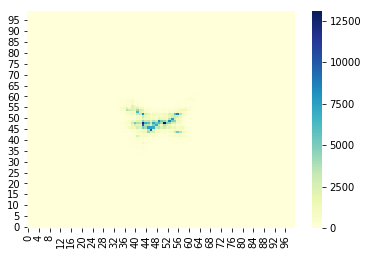

In [95]:
resolution = (100,100)
# ax = plot_scene()
activity_map, ax = heat_map(resolution,visitor_data['Location_x_1'],visitor_data['Location_z_1'])
# plot_scene(ax)

In [85]:
activity_map

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., 13., 13.,  8.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 16., 13., 13., 38.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 60., 25.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

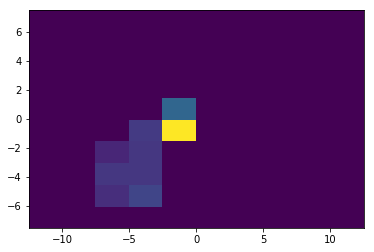

In [82]:
h, xedges, yedges, _ = plt.hist2d(visitor_data['Location_x_1'][0:200], visitor_data['Location_z_1'][0:200], range=[[-12.5,12.5],[-7.5,7.5]], bins=10)

In [83]:
h

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 11., 13.,  9.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., 17., 13., 13., 14.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 83., 27.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

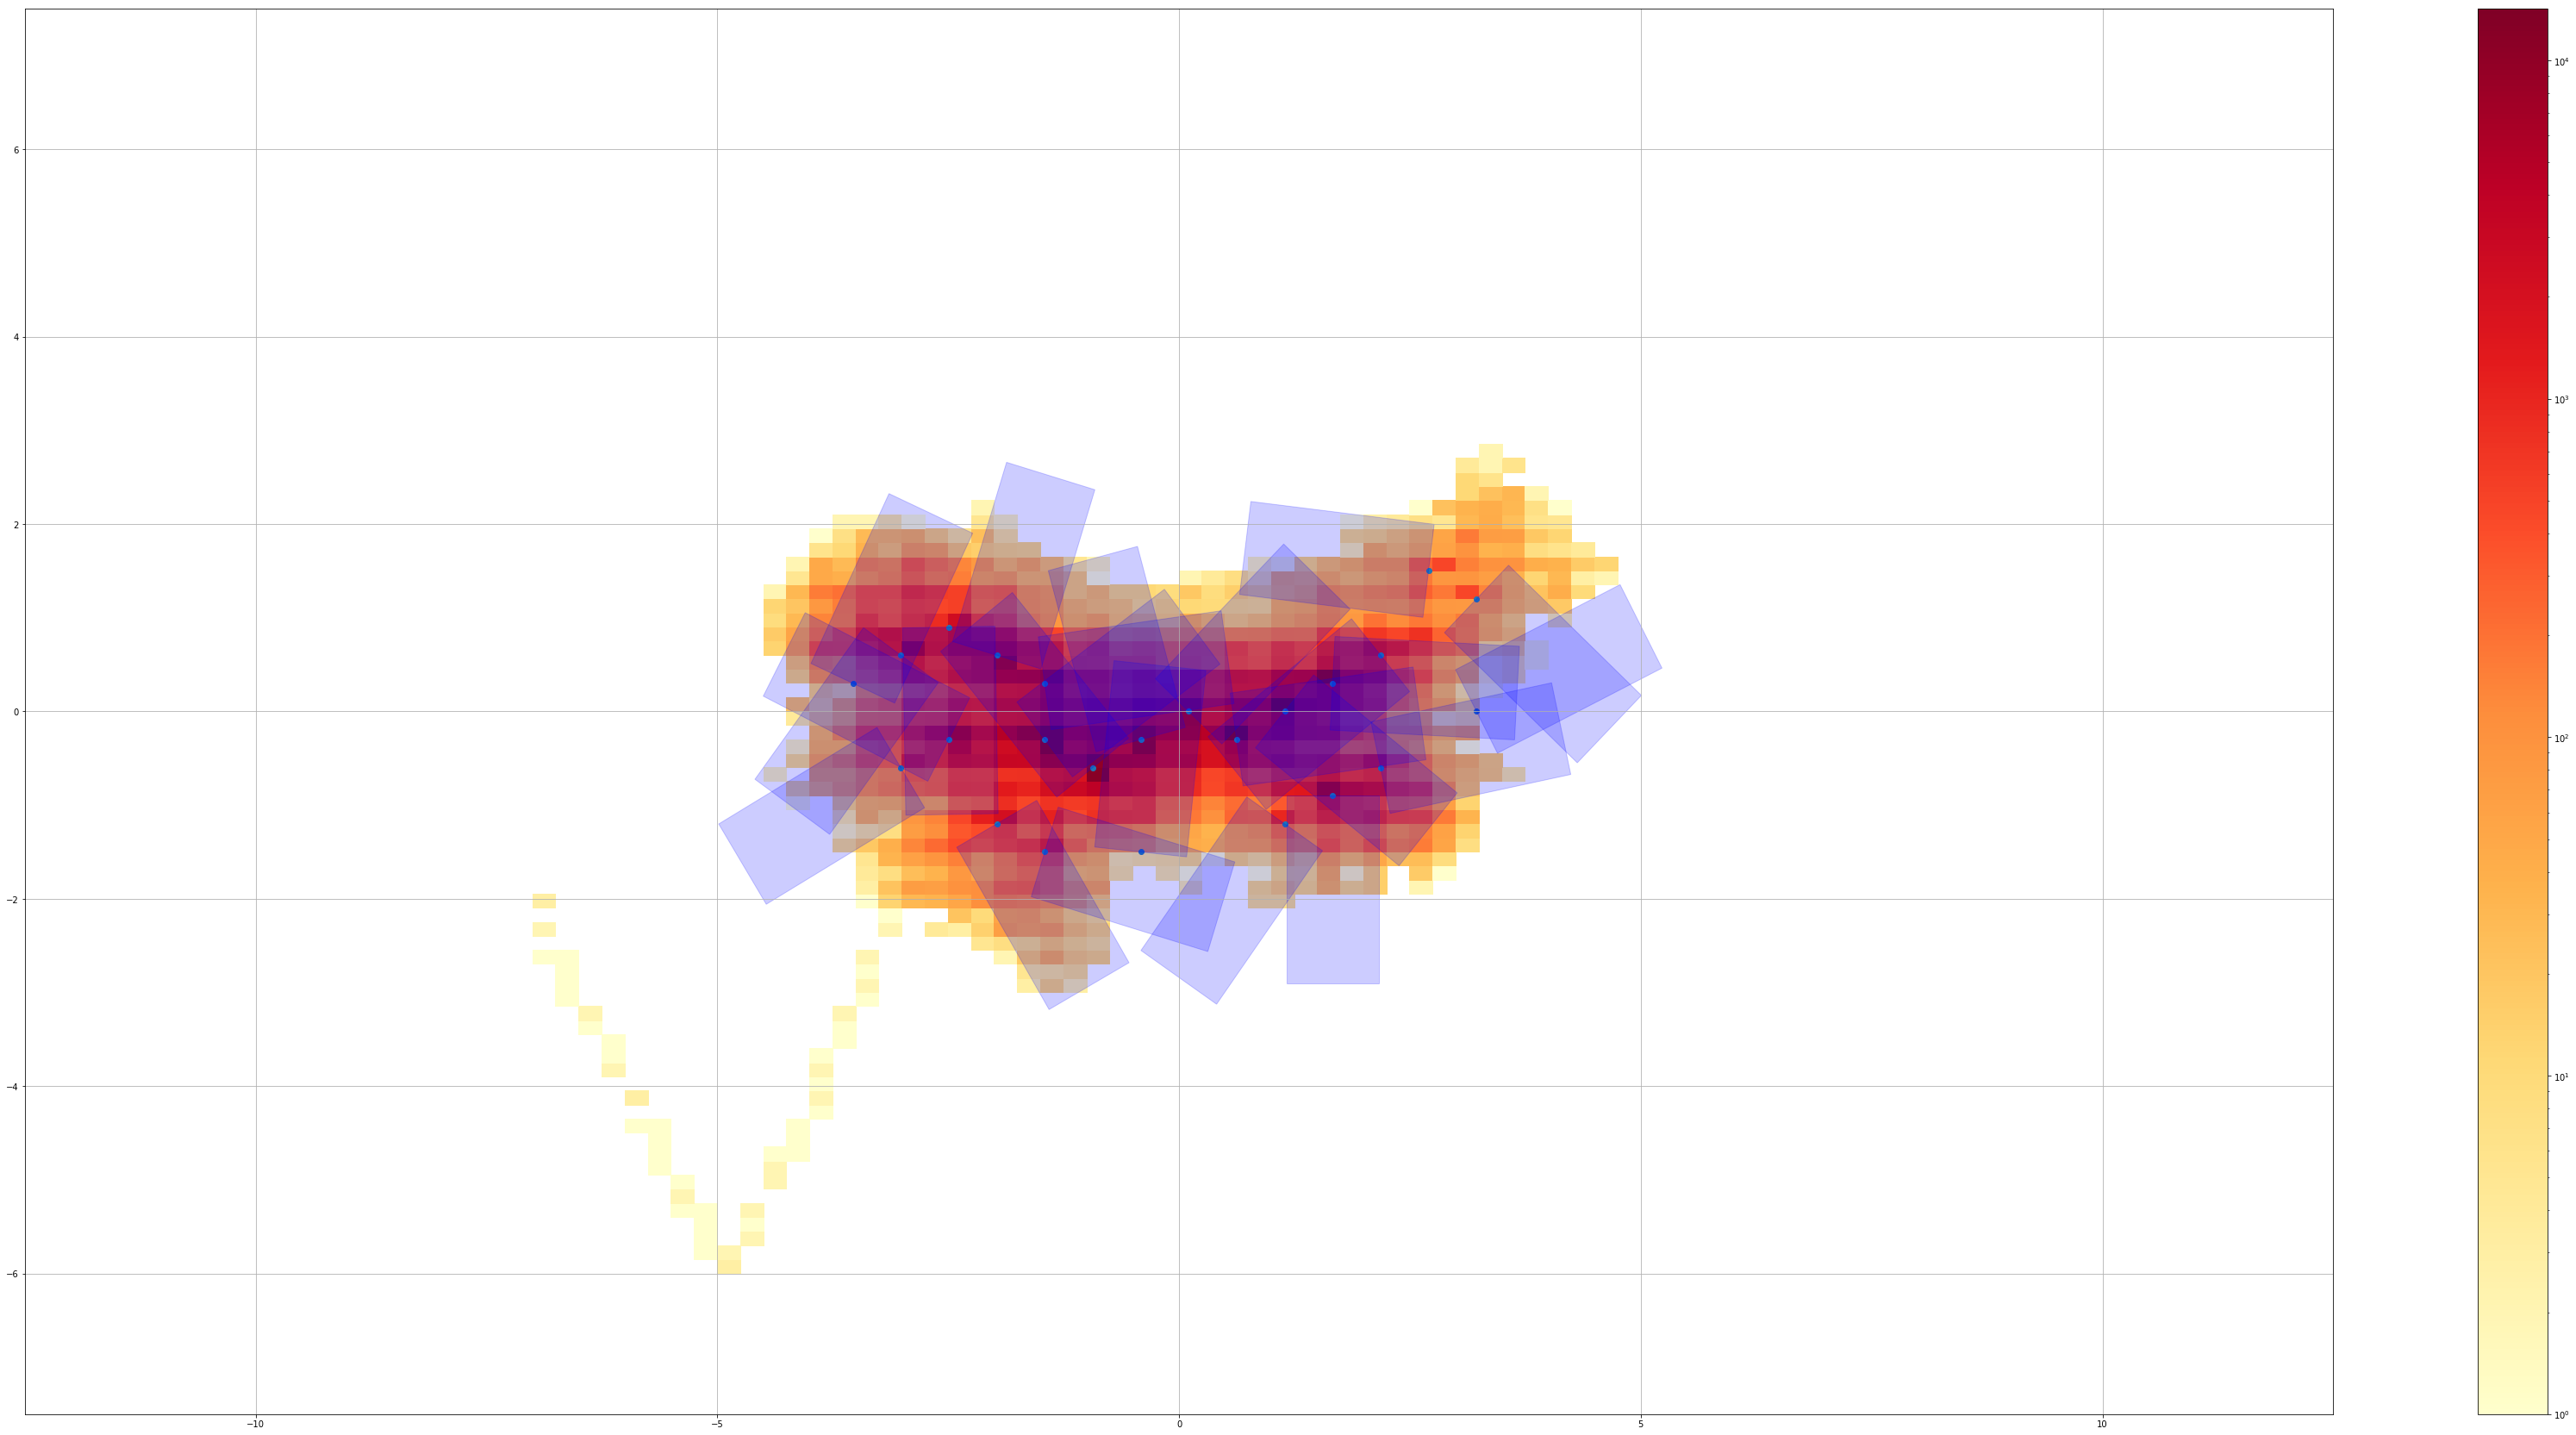

In [89]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(60,30))
ax = fig.add_subplot(111)

plt.hist2d(visitor_data['Location_x_1'], visitor_data['Location_z_1'], bins=100, normed=False, range=[[-12.5,12.5],[-7.5,7.5]], cmap='YlOrRd', norm=LogNorm())
plt.colorbar()
plt.grid()
plot_scene(ax)